# Dawood Sarfraz

# Project Title : Mart Sales Prediction Using XGBoost

## Importing the Dependencies

In [1097]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Data Collection and Processing

In [1005]:
# loading the data from csv file to Pandas DataFrame
df = pd.read_csv('Train.csv')

In [1006]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [1007]:
# first 5 rows of the dataframe
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1008]:
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [1009]:
df[4500:4510]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4500,FDU25,12.350,Low Fat,0.026832,Canned,57.3246,OUT017,2007,NaN,Tier 2,Supermarket Type1,1332.2658
4501,NCU42,9.000,Low Fat,0.019617,Household,169.6474,OUT017,2007,NaN,Tier 2,Supermarket Type1,2526.7110
4502,FDH21,10.395,LF,0.052264,Seafood,158.4604,OUT010,1998,NaN,Tier 3,Grocery Store,158.4604
4503,DRO47,10.195,Low Fat,0.112203,Hard Drinks,111.7860,OUT035,2004,Small,Tier 2,Supermarket Type1,1697.7900
4504,FDC44,NaN,Low Fat,0.171761,Fruits and Vegetables,115.7518,OUT027,1985,Medium,Tier 3,Supermarket Type3,5351.0346
4505,NCL29,9.695,Low Fat,0.114171,Health and Hygiene,158.9604,OUT045,2002,NaN,Tier 2,Supermarket Type1,1743.0644
4506,FDL48,19.350,Regular,0.082266,Baking Goods,48.8034,OUT046,1997,Small,Tier 1,Supermarket Type1,340.2238
4507,FDJ21,16.700,Regular,0.038685,Snack Foods,146.6102,OUT018,2009,Medium,Tier 3,Supermarket Type2,2770.3938
4508,FDT40,5.985,LF,0.095795,Frozen Foods,128.4678,OUT046,1997,Small,Tier 1,Supermarket Type1,508.6712
4509,NCD43,8.850,Low Fat,0.026814,Household,103.7964,OUT010,1998,NaN,Tier 3,Grocery Store,210.3928


In [1010]:
# number of data points & number of features
df.shape

(8523, 12)

In [1011]:
# getting some information about thye dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [1012]:
# checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [1013]:
df.duplicated().sum()

0

In [1014]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [1015]:
df.columns # Total columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [1016]:
cols = df.columns # Categorical values columns
num_cols = df._get_numeric_data().columns
num_cols
list(set(cols) - set(num_cols))

['Outlet_Type',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Identifier',
 'Item_Identifier',
 'Item_Fat_Content',
 'Outlet_Location_Type']

In [1017]:
df['Item_Identifier'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Identifier
Non-Null Count  Dtype 
--------------  ----- 
8523 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


In [1018]:
df["Outlet_Size"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Outlet_Size
Non-Null Count  Dtype 
--------------  ----- 
6113 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


In [1019]:
df["Outlet_Type"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Outlet_Type
Non-Null Count  Dtype 
--------------  ----- 
8523 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


In [1020]:
df["Item_Fat_Content"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Fat_Content
Non-Null Count  Dtype 
--------------  ----- 
8523 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


In [1021]:
df["Item_Identifier"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Identifier
Non-Null Count  Dtype 
--------------  ----- 
8523 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


In [1022]:
df["Item_Type"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Type
Non-Null Count  Dtype 
--------------  ----- 
8523 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


In [1023]:
df["Outlet_Location_Type"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Outlet_Location_Type
Non-Null Count  Dtype 
--------------  ----- 
8523 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


Handling Missing Values


Mean:
    Average of all values <br>
Mode:
    Most Repeated value


In [1024]:
# mean value of "Item_Weight" column
df['Item_Weight'].mean()

12.857645184135976

In [1025]:
mean = df['Item_Weight'].mean()

In [1026]:
mean

12.857645184135976

In [1027]:
# filling the missing values in "Item_weight column" with "Mean" value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [1028]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [1029]:
# mode of "Outlet_Size" column
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [1030]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [1031]:
(mode_of_Outlet_size)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [1032]:
missing_values = df['Outlet_Size'].isnull()

In [1033]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [1034]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [1035]:
# checking for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [1036]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Numerical Features

In [1037]:
sns.set()

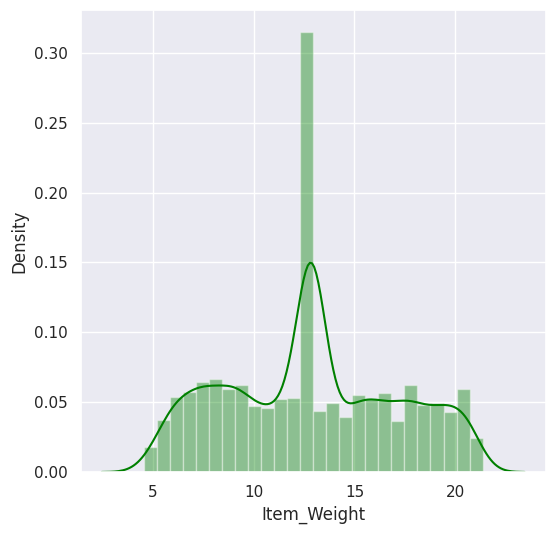

In [1038]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'],color="green")
plt.show()

In [1039]:
from collections import Counter 
cnt = Counter()

for t in df['Item_Weight'] : 
    cnt[t] += 1 
    
cnt.most_common()   

[(12.857645184135976, 1463),
 (12.15, 86),
 (17.6, 82),
 (13.65, 77),
 (11.8, 76),
 (9.3, 68),
 (15.1, 68),
 (10.5, 66),
 (16.7, 66),
 (19.35, 63),
 (16.0, 62),
 (20.7, 62),
 (9.8, 61),
 (17.7, 60),
 (17.75, 60),
 (18.85, 59),
 (15.85, 59),
 (15.0, 59),
 (19.6, 58),
 (18.25, 58),
 (16.75, 58),
 (15.7, 57),
 (9.195, 56),
 (12.5, 56),
 (10.195, 53),
 (12.6, 53),
 (12.1, 53),
 (20.2, 53),
 (15.6, 52),
 (13.5, 51),
 (11.5, 51),
 (19.7, 50),
 (11.6, 50),
 (20.25, 50),
 (12.35, 50),
 (12.85, 49),
 (12.3, 49),
 (9.5, 49),
 (13.15, 49),
 (9.6, 49),
 (17.85, 48),
 (15.5, 47),
 (14.0, 47),
 (20.35, 47),
 (16.35, 46),
 (15.2, 46),
 (16.5, 46),
 (17.25, 45),
 (9.0, 44),
 (19.0, 44),
 (20.5, 44),
 (14.5, 44),
 (10.1, 44),
 (16.2, 43),
 (10.0, 43),
 (10.3, 43),
 (18.2, 43),
 (13.35, 42),
 (11.1, 42),
 (17.5, 41),
 (14.15, 41),
 (16.1, 41),
 (19.1, 41),
 (13.0, 40),
 (15.35, 40),
 (19.2, 39),
 (11.65, 39),
 (20.75, 39),
 (13.1, 39),
 (19.85, 39),
 (18.7, 38),
 (18.0, 38),
 (20.6, 38),
 (18.6, 37),
 (

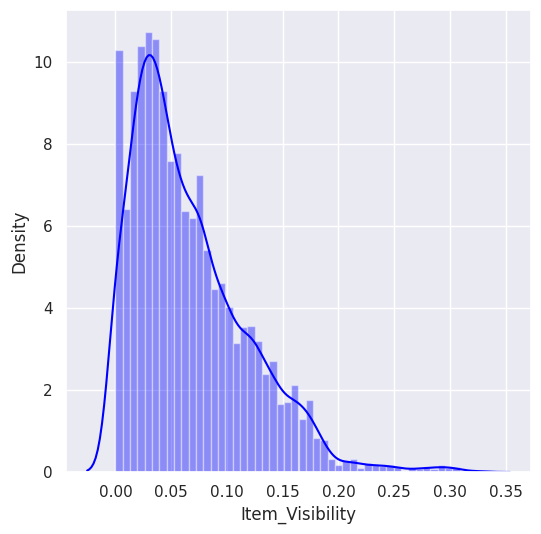

In [1040]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'], color= "blue")
plt.show()

In [1041]:
from collections import Counter 
cnt = Counter()

for t in df['Item_Visibility'] : 
    cnt[t] += 1 
    
cnt.most_common()   

[(0.0, 526),
 (0.076975118, 3),
 (0.02681843, 2),
 (0.071958197, 2),
 (0.07461309, 2),
 (0.074627201, 2),
 (0.079806266, 2),
 (0.041177505, 2),
 (0.144338493, 2),
 (0.076855628, 2),
 (0.076841095, 2),
 (0.045165796, 2),
 (0.134975628, 2),
 (0.127929521, 2),
 (0.085622362, 2),
 (0.041291169, 2),
 (0.103422709, 2),
 (0.072284689, 2),
 (0.0268952, 2),
 (0.080640478, 2),
 (0.121250374, 2),
 (0.074931201, 2),
 (0.080131363, 2),
 (0.162462044, 2),
 (0.026950104, 2),
 (0.160624116, 2),
 (0.080968973, 2),
 (0.071832909, 2),
 (0.085274988, 2),
 (0.112859454, 2),
 (0.106968096, 2),
 (0.076483451, 2),
 (0.072410764, 2),
 (0.081096613, 2),
 (0.037549969, 2),
 (0.058542509, 2),
 (0.026355345, 2),
 (0.045073782, 2),
 (0.097043739, 2),
 (0.058121214, 2),
 (0.135707553, 2),
 (0.052149675, 2),
 (0.040911824, 2),
 (0.107036943, 2),
 (0.12152072, 2),
 (0.187841082, 2),
 (0.08062523, 2),
 (0.074778547, 2),
 (0.128011859, 2),
 (0.136286138, 2),
 (0.061163967, 2),
 (0.14492016, 2),
 (0.037574137, 2),
 (0.10

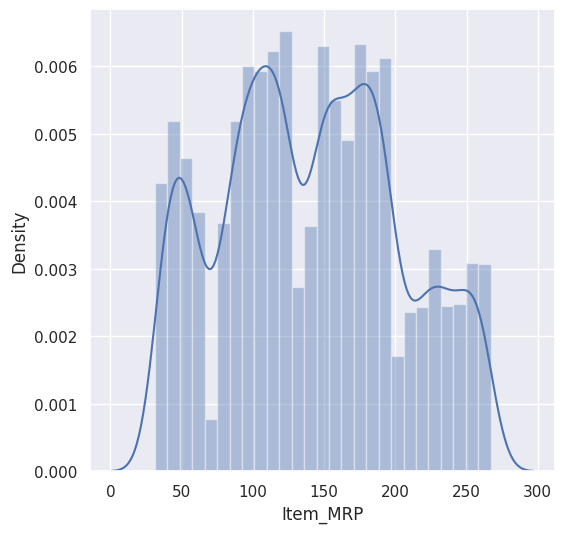

In [1042]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

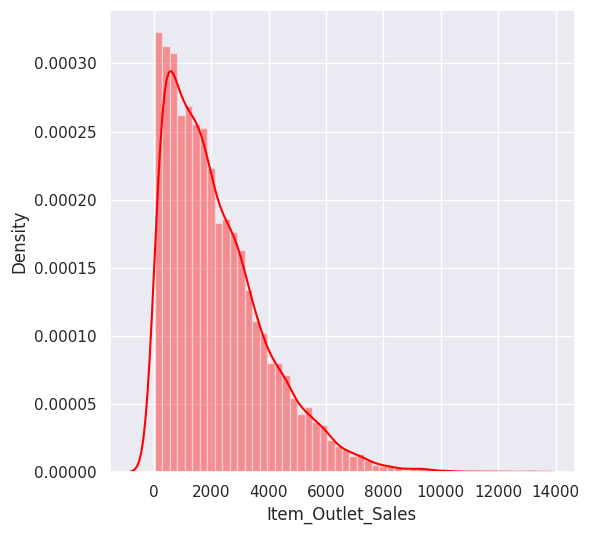

In [1043]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'],color="red")
plt.show()

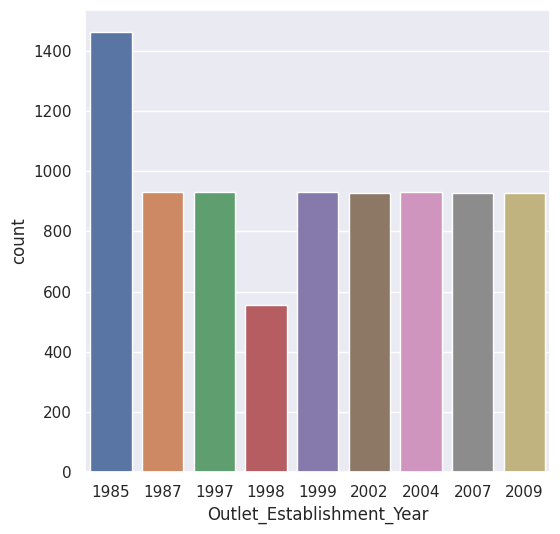

In [1044]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

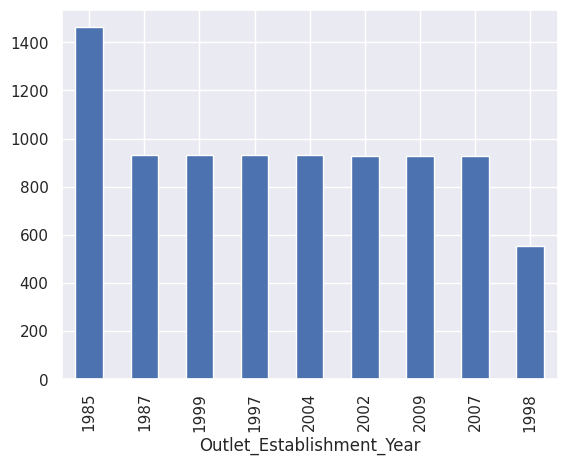

In [1045]:
df['Outlet_Establishment_Year'].value_counts().plot(kind='bar')  # highly NOT recommended! 
plt.show()

In [1046]:
from collections import Counter 
cnt = Counter()

for t in df['Outlet_Establishment_Year'] : 
    cnt[t] += 1 
    
cnt.most_common()   

[(1985, 1463),
 (1987, 932),
 (1999, 930),
 (1997, 930),
 (2004, 930),
 (2002, 929),
 (2009, 928),
 (2007, 926),
 (1998, 555)]

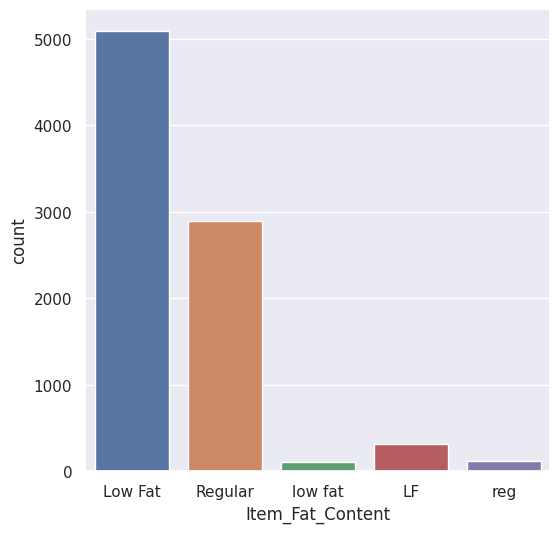

In [1047]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

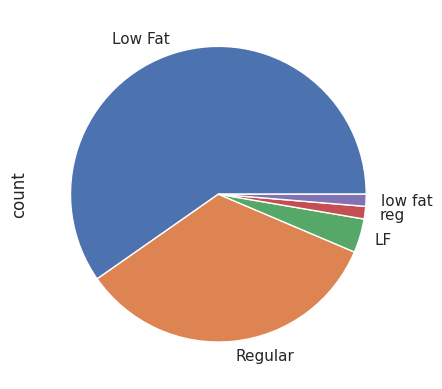

In [1048]:
df['Item_Fat_Content'].value_counts().plot(kind='pie')  # highly NOT recommended! 
plt.show()

In [1049]:
from collections import Counter 
cnt = Counter()

for t in df['Item_Fat_Content'] : 
    cnt[t] += 1 
    
cnt.most_common()   

[('Low Fat', 5089),
 ('Regular', 2889),
 ('LF', 316),
 ('reg', 117),
 ('low fat', 112)]

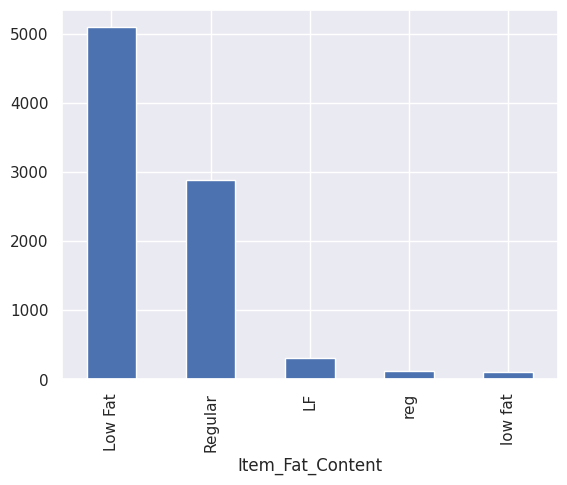

In [1050]:
df['Item_Fat_Content'].value_counts().plot(kind='bar')  # highly NOT recommended! 
plt.show()

In [1051]:
from collections import Counter 
cnt = Counter()

for t in df['Item_Fat_Content'] : 
    cnt[t] += 1 
    
cnt.most_common()   

[('Low Fat', 5089),
 ('Regular', 2889),
 ('LF', 316),
 ('reg', 117),
 ('low fat', 112)]

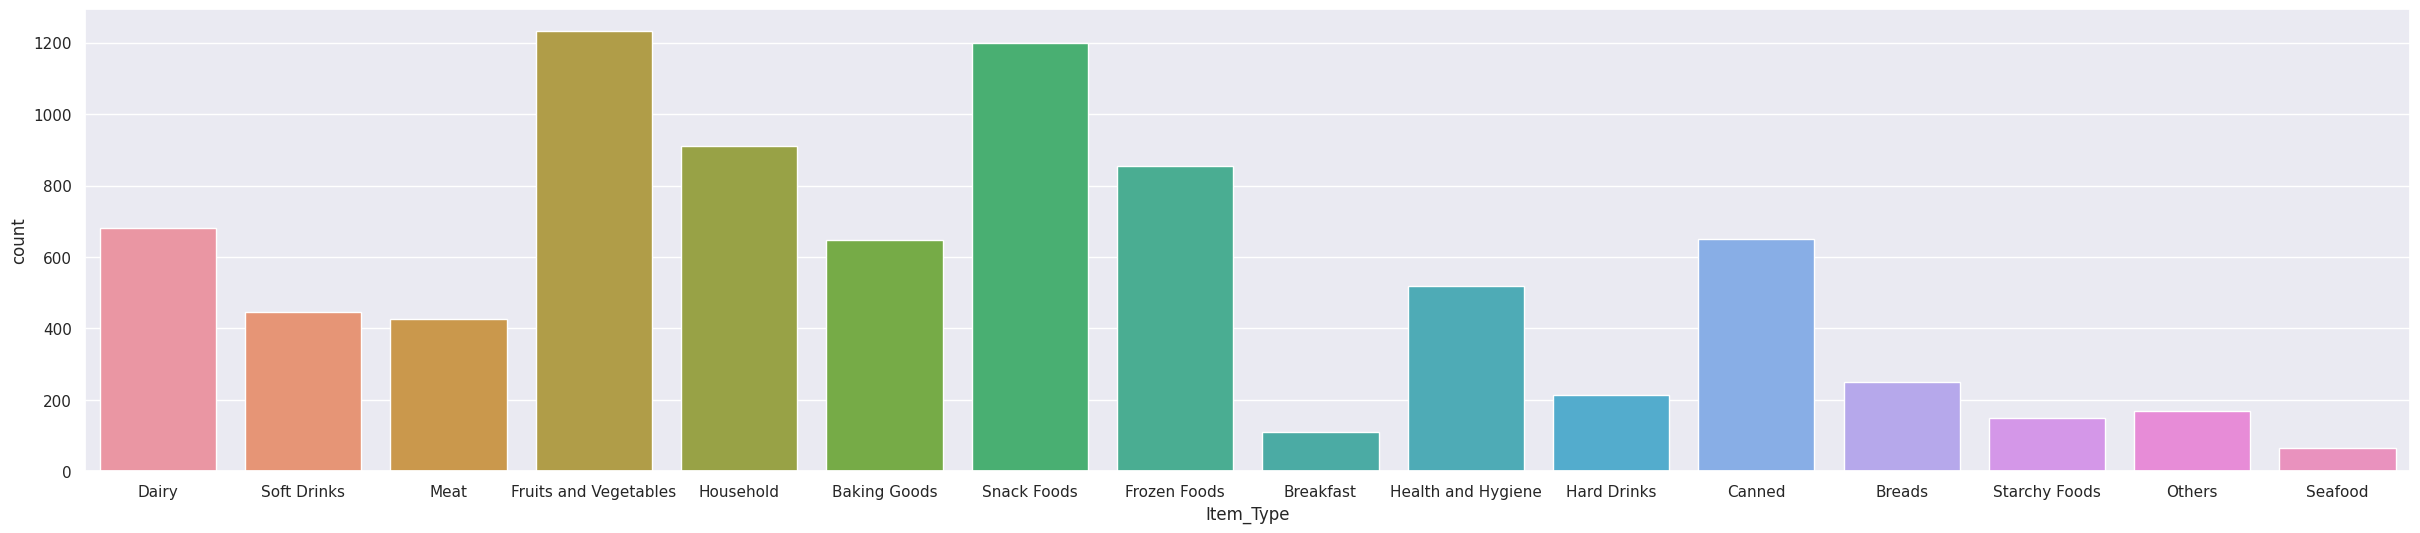

In [1052]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

In [1053]:
from collections import Counter 
cnt = Counter()

for t in df['Item_Type'] : 
    cnt[t] += 1 
    
cnt.most_common()   

[('Fruits and Vegetables', 1232),
 ('Snack Foods', 1200),
 ('Household', 910),
 ('Frozen Foods', 856),
 ('Dairy', 682),
 ('Canned', 649),
 ('Baking Goods', 648),
 ('Health and Hygiene', 520),
 ('Soft Drinks', 445),
 ('Meat', 425),
 ('Breads', 251),
 ('Hard Drinks', 214),
 ('Others', 169),
 ('Starchy Foods', 148),
 ('Breakfast', 110),
 ('Seafood', 64)]

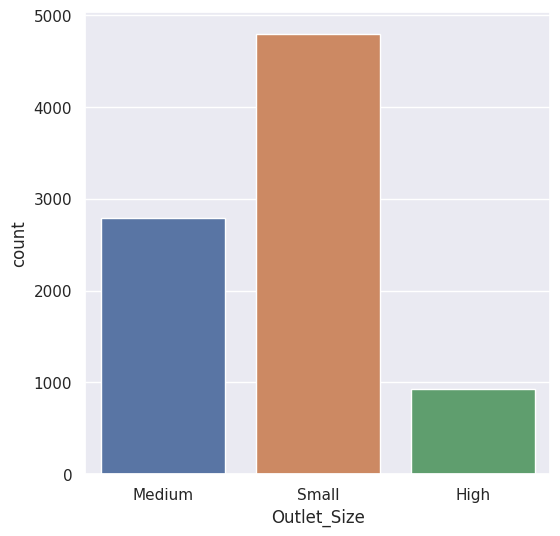

In [1054]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

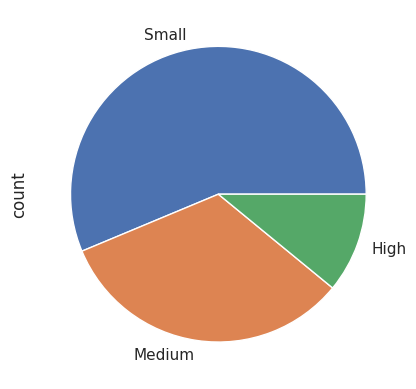

In [1055]:
df['Outlet_Size'].value_counts().plot(kind='pie')  # highly NOT recommended! 
plt.show()

In [1056]:
from collections import Counter 
cnt = Counter()

for t in df['Outlet_Size'] : 
    cnt[t] += 1 
    
cnt.most_common()   

[('Small', 4798), ('Medium', 2793), ('High', 932)]

# Data Pre-Processing

In [1057]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1058]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [1059]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [1060]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# Label Encoding

In [1061]:
from sklearn.preprocessing import LabelEncoder

In [1062]:
encoder = LabelEncoder()

In [1063]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = (df['Outlet_Size']).astype(str)

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [1064]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [1065]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting features and Target

In [1098]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

In [1099]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [1100]:
X.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1
5,758,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3
8,440,16.200000,1,0.016687,5,96.9726,7,2002,2,1,1
9,990,19.200000,1,0.094450,5,187.8214,2,2007,2,1,1


In [1101]:
X.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8513,449,12.000,1,0.020407,10,99.9042,6,2004,2,1,1
8514,145,15.000,1,0.054489,3,57.5904,7,2002,2,1,1
8515,445,20.700,0,0.021518,0,157.5288,3,2009,1,2,2
8516,1356,18.600,0,0.118661,11,58.7588,3,2009,1,2,2
8517,389,20.750,1,0.083607,5,178.8318,8,1997,2,0,1
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2
8522,50,14.800,0,0.044878,14,75.4670,8,1997,2,0,1


In [1102]:
X[4500:4510]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4500,987,12.350000,0,0.026832,3,57.3246,2,2007,2,1,1
4501,1506,9.000000,0,0.019617,9,169.6474,2,2007,2,1,1
4502,443,10.395000,0,0.052264,12,158.4604,0,1998,2,2,0
4503,137,10.195000,0,0.112203,7,111.7860,6,2004,2,1,1
4504,264,12.857645,0,0.171761,6,115.7518,5,1985,1,2,3
4505,1381,9.695000,0,0.114171,8,158.9604,7,2002,2,1,1
4506,610,19.350000,1,0.082266,0,48.8034,8,1997,2,0,1
4507,519,16.700000,1,0.038685,13,146.6102,3,2009,1,2,2
4508,950,5.985000,0,0.095795,5,128.4678,8,1997,2,0,1
4509,1301,8.850000,0,0.026814,9,103.7964,0,1998,2,2,0


In [1103]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [1104]:
Y.head(10)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
5     556.6088
6     343.5528
7    4022.7636
8    1076.5986
9    4710.5350
Name: Item_Outlet_Sales, dtype: float64

In [1105]:
Y.tail(10)

8513     595.2252
8514     468.7232
8515    1571.2880
8516     858.8820
8517    3608.6360
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, dtype: float64

In [1106]:
Y[4500:4510]

4500    1332.2658
4501    2526.7110
4502     158.4604
4503    1697.7900
4504    5351.0346
4505    1743.0644
4506     340.2238
4507    2770.3938
4508     508.6712
4509     210.3928
Name: Item_Outlet_Sales, dtype: float64

# Splitting the data into Training data & Testing Data

In [1107]:
from sklearn.model_selection import train_test_split

In [1076]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [1077]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Machine Learning Model Training

In [1108]:
from xgboost import XGBRegressor, XGBClassifier

# XGBoost Regressor

In [1109]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [1110]:
regressor = XGBRegressor()

In [1111]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

In [1112]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

# Metrics : quantifying the quality of predictions

In [1115]:
from sklearn import metrics

In [1116]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R-Squared:", r2)

R-Squared: 0.8596212466140883


In [1117]:
mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("MAE:",mae)

MAE: 464.67462940512064


In [1118]:
mse = metrics.mean_squared_error(Y_train, training_data_prediction)
print("MSE:", mse)

MSE: 415247.40456803684


In [1119]:
rmse = np.sqrt(mse) # or mse**(0.5)  
print("R-Squared:", rmse)

R-Squared: 644.3969309114041


In [1120]:
r2 = metrics.r2_score(Y_train, training_data_prediction)
print("RMSE:", rmse)

RMSE: 644.3969309114041


# Testing Data 

In [1121]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [1122]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("MAE:",mae)

MAE: 786.9180486407753


In [1123]:
mse = metrics.mean_squared_error(Y_test, test_data_prediction)
print("MSE:", mse)

MSE: 1279131.4395240077


In [1124]:
rmse = np.sqrt(mse) # or mse**(0.5)  
print("RMSE:", rmse)

RMSE: 1130.9869316327256


In [1125]:
r2 = metrics.r2_score(Y_test, test_data_prediction)
print("R-Squared:", r2)

R-Squared: 0.5293798650563337
